# Inverse kinematics

This notebook provides an interactive environment where to play with the inverse kinematics.

## Arm parameters

In [ ]:
# Define link lengths in mm
L1 = 94  # Link 2 length
L2 = 80  # Link 2 length

## Inverse kinematics solution

In [25]:
import numpy as np

# Inverse kinematics function
def inverse_kinematics(x, y):
    distance = np.sqrt(x**2 + y**2)
    
    # Check if the point is reachable
    if distance > (L1 + L2):
        return None  # Point is out of reach

    # Compute c3 (cosine of the third angle)
    c3 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    s3_p = np.sqrt(1 - c3**2)
    
    # Compute q3 (third angle)
    q3_p = np.arctan2(s3_p, c3)
    
    # Compute q2 (second angle)
    A = L2 * c3 + L1
    B_p = L2 * s3_p
    q2_p = np.arctan2(y, x) - np.arctan2(B_p, A)

    return q2_p, q3_p


In [55]:
# Example

x_target = 120
y_target = 200

result = inverse_kinematics(x_target, y_target)
if result is not None:
    q2, q3 = result
    print(f'q2: {np.rad2deg(q2)}\nq3: {np.rad2deg(q3)}')
else:
    print(f'Point {x_target}, {y_target} is unreachable.')

Point 120, 200 is unreachable.


## Plot

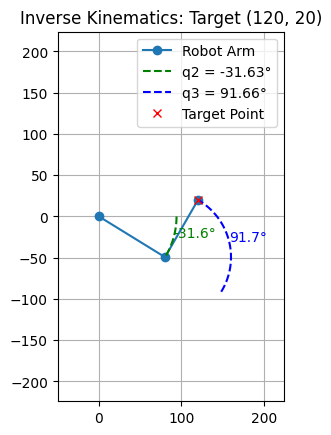

In [57]:
import matplotlib.pyplot as plt

# Updated visualization function with angle arcs and annotations
def plot_robot_with_angles(x, y):

    # Plotting the robot arm
    plt.figure()

    result = inverse_kinematics(x, y)    
    if result is not None:
        q2, q3 = result
    else:
        q2, q3 = 0, 0

    # Joint positions
    joint1_x, joint1_y = L1 * np.cos(q2), L1 * np.sin(q2)
    joint2_x = joint1_x + L2 * np.cos(q2 + q3)
    joint2_y = joint1_y + L2 * np.sin(q2 + q3)
    plt.plot([0, joint1_x, joint2_x], [0, joint1_y, joint2_y], '-o', label="Robot Arm")
    
    if result is not None:

        # Drawing angle arcs and adding annotations
        arc = np.linspace(0, q2, 100)
        plt.plot(L1 * np.cos(arc), L1 * np.sin(arc), 'g--', label=f'q2 = {np.degrees(q2):.2f}°')
        plt.text(L1 * np.cos(q2/2), L1 * np.sin(q2/2), f'{np.degrees(q2):.1f}°', color='g')

        arc = np.linspace(q2, q2 + q3, 100)
        plt.plot(joint1_x + L2 * np.cos(arc), joint1_y + L2 * np.sin(arc), 'b--', label=f'q3 = {np.degrees(q3):.2f}°')
        plt.text(joint1_x + L2 * np.cos(q2 + q3/2), joint1_y + L2 * np.sin(q2 + q3/2), f'{np.degrees(q3):.1f}°', color='b')

    # Draw the target point        
    plt.plot(x, y, 'rx', label="Target Point")
    
    # Set axis limits
    major_tile_size = 50

    x_min = - major_tile_size
    x_max = L1 + L2 + major_tile_size
    y_min = -L1 - L2 - major_tile_size
    y_max = L1 + L2 + major_tile_size
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Set aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().grid(True)

    plt.title(f"Inverse Kinematics: Target ({x}, {y})")
    plt.legend()
    plt.show()

# Example

x_target = 120
y_target = 20
plot_robot_with_angles(x_target, y_target)